# Linear regression 02

##### Josep Fortiana 2019-10-08

## 1. Multicollinearity and condition number

### Acetylene data

Download the files: `Acetylene.dat.txt` (data description), `Acetylene.txt` (actual data). We will use these data for multiple linear regression.

In [1]:
Acetylene<-read.table("Acetylene.txt",header=TRUE)
str(Acetylene)

'data.frame':	16 obs. of  4 variables:
 $ X1: int  1300 1300 1300 1300 1300 1300 1200 1200 1200 1200 ...
 $ X2: num  7.5 9 11 13.5 17 23 5.3 7.5 11 13.5 ...
 $ X3: num  0.012 0.012 0.0115 0.013 0.0135 0.012 0.04 0.038 0.032 0.026 ...
 $ Y : num  49 50.2 50.5 48.5 47.5 44.5 28 31.5 34.5 35 ...


#### A description of data

In [2]:
summary(Acetylene)

       X1             X2              X3                Y        
 Min.   :1100   Min.   : 5.30   Min.   :0.01150   Min.   :15.00  
 1st Qu.:1175   1st Qu.: 7.50   1st Qu.:0.01275   1st Qu.:29.12  
 Median :1200   Median :11.00   Median :0.03300   Median :36.50  
 Mean   :1212   Mean   :12.44   Mean   :0.04031   Mean   :36.11  
 3rd Qu.:1300   3rd Qu.:17.00   3rd Qu.:0.05175   3rd Qu.:47.75  
 Max.   :1300   Max.   :23.00   Max.   :0.09800   Max.   :50.50  

In [3]:
round(cor(Acetylene),2)

,X1,X2,X3,Y
X1,1.00,0.22,-0.96,0.95
X2,0.22,1.00,-0.24,0.37
X3,-0.96,-0.24,1.00,-0.91
Y,0.95,0.37,-0.91,1.00


#### Linear model with a linear influence of each of the  three available predictors _(main effects)_ 

In [4]:
Acetylene.lm.1<-lm(Y~X1+X2+X3,data=Acetylene)
summary(Acetylene.lm.1)


Call:
lm(formula = Y ~ X1 + X2 + X3, data = Acetylene)

Residuals:
   Min     1Q Median     3Q    Max 
-6.920 -1.856  0.234  2.074  6.948 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept) -121.26962   55.43571  -2.188   0.0492 *
X1             0.12685    0.04218   3.007   0.0109 *
X2             0.34816    0.17702   1.967   0.0728 .
X3           -19.02170  107.92824  -0.176   0.8630  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.767 on 12 degrees of freedom
Multiple R-squared:  0.9198,	Adjusted R-squared:  0.8998 
F-statistic: 45.88 on 3 and 12 DF,  p-value: 7.522e-07


#### Syntax for prediction

Assume we have a (or several) new observation(s) of $X1$, $X2$, $X3$. What does the model `Acetylene.lm.1` predict for the corresponding value(s) of $Y$?

$X1=1200$, $X2=11.0$, $X3=0.033$ 

Here I have chosen the median values, just as an example. Any value within the predictor ranges will do. Prediction for values outside this range (extrapolation) is possible but one should be wary of large errors. 

Procedure is to build a `data.frame` with the new values (including variable names) and use the predict function:

In [5]:
new.observation<-data.frame(X1=1200,X2=11.0,X3=0.033)
Acetylene.prediction.1<-predict(Acetylene.lm.1,newdata=new.observation,type="response")
Acetylene.prediction.2<-predict(Acetylene.lm.1,newdata=new.observation,type="response", interval="confidence")
Acetylene.prediction.3<-predict(Acetylene.lm.1,newdata=new.observation,type="response", interval="prediction")

In [8]:
#str(Acetylene.prediction.1)
Acetylene.prediction.1
#str(Acetylene.prediction.2)
Acetylene.prediction.2
#str(Acetylene.prediction.3)
Acetylene.prediction.3

1 
34.15702

fit,lwr,upr
34.15702,30.58172,37.73232


fit,lwr,upr
34.15702,25.20437,43.10967


#### Investigate multicollinearity

Extract the _regression (or model) matrix,_ i.e., the result of pasting a column of ones to the matrix containing the values of  `X1`, `X2`, `X3`. The new column will correspond to the `(Intercept)` regression term.

In [9]:
X<-model.matrix(Acetylene.lm.1)
X
round(cor(X[,-1]),3)

(Intercept),X1,X2,X3
1,1300,7.5,0.0120
1,1300,9.0,0.0120
1,1300,11.0,0.0115
1,1300,13.5,0.0130
1,1300,17.0,0.0135
1,1300,23.0,0.0120
1,1200,5.3,0.0400
1,1200,7.5,0.0380
1,1200,11.0,0.0320
1,1200,13.5,0.0260


,X1,X2,X3
X1,1.000,0.224,-0.958
X2,0.224,1.000,-0.240
X3,-0.958,-0.240,1.000


Matrix $Q=X'\cdot X$ of cross-products, its determinant and its inverse:

In [10]:
Q<- t(X) %*% X
round(Q,3)
round(det(Q),3)
Q1<-solve(Q)
round(Q1,3)

,(Intercept),X1,X2,X3
(Intercept),16.000,19400.0,199.100,0.645
X1,19400.000,23620000.0,242940.000,745.400
X2,199.100,242940.0,2958.430,7.381
X3,0.645,745.4,7.381,0.041


[1] 868196.3

,(Intercept),X1,X2,X3
(Intercept),216.556,-0.165,-0.048,-406.513
X1,-0.165,0.000,0.000,0.307
X2,-0.048,0.000,0.002,0.125
X3,-406.513,0.307,0.125,820.847


Regression coefficients estimates $\hat{\beta}$:

$$
    \hat{\beta}=(X'\cdot X)^{-1}\cdot X' \cdot y.
$$

$y$ is the column of responses.

In [11]:
y<-as.matrix(Acetylene$Y)
Q1%*%t(X) %*% y

(Intercept),-121.2696214
X1,0.1268539
X2,0.3481576
X3,-19.0216969


Compute $V$, variances and covariances matrix of the regression coefficients estimators $\hat{\beta}$, in two ways:

(1) Directly from the above formula, using the fact that $\operatorname{Var}(y)=\sigma^{2}\,I$, substituting the ML estimate $\hat{\sigma}^{2}$.

(2) With the `vcov()` function in R.

In [12]:
sigma.hat<-summary(Acetylene.lm.1)$sigma
V<-sigma.hat^2*Q1
round(V,3)
vcov(Acetylene.lm.1)

,(Intercept),X1,X2,X3
(Intercept),3073.118,-2.335,-0.676,-5768.763
X1,-2.335,0.002,0.000,4.352
X2,-0.676,0.000,0.031,1.778
X3,-5768.763,4.352,1.778,11648.504


,(Intercept),X1,X2,X3
(Intercept),3073.1176892,-2.3350689880,-0.6755487518,-5768.762894
X1,-2.3350690,0.0017793193,0.0001764518,4.352212
X2,-0.6755488,0.0001764518,0.0313350447,1.777998
X3,-5768.7628939,4.3522124727,1.7779975238,11648.503915


Diagonal entries in $V$ are the variances of the coefficient estimators. We observe two of them are quite large, indicating model instability. 

This behaviour can be more precisely detected by using the _Variance Inflation Factors (VIF),_ which we compute with the `vif()` function from the `car` package. Intuitively, VIF's quantify _multicollinearity_ in the data, that is, linear dependences in the set of predictors. The VIF of a predictor is the proportion of its actual variance relative to the one it would have if it were linearly independent from the others:

In [39]:
#install.packages("car",dependencies=TRUE,repos="https://cloud.r-project.org")
#install.packages("VIF")
require(VIF)
?vif

Installing package into ‘/home/crquispq7.alumnes/R/x86_64-pc-linux-gnu-library/3.3’
(as ‘lib’ is unspecified)
Loading required package: VIF


In [40]:
vif(Acetylene.lm.1)

Warning message in mean.default(y):
“argument is not numeric or logical: returning NA”

ERROR: Error in as.vector(y) - mean(y): argumento no-numérico para operador binario


The commonly accepted rule of thumb is that a VIF larger than 10 is too large, indicating multicollinearity. 

Another quantity used in multicollinearity detection is the _condition number_ of the model matrix $X$. In general, the condition number $\kappa(A)$ of a matrix $A$ measures the numerical inaccuracy introduced by solving the equation $A\cdot x = b$ for a given column vector $b$. Technically it is the ratio between the maximum and minimum singular values of $A$. When $\kappa\approx1$ there is no significant precision loss. When $\kappa=10^k$ the precision loss of $k$ significant decimal digits:

The `kappa()` function in R gives the condition number of a matrix. We check the condition number of the model matrix $X$ of this regression:

In [41]:
kappa(X)

[1] 201893.3

We see that these data have bad condition for regression. The practical consequence of this fact is that predictions $\hat{y}$ obtained from this model are unreliable. 

The predicted $\hat{y}$ for a new $x$ can be computed as usual:

In [ ]:
newy<-predict(Acetylene.lm.1,newdata=data.frame(X1=1100,X2=8,X3=0.02), type="response")
round(newy,3)

However, due to the bad condition of the model it would be unadvisable to rely upon this value, which possibly will have a large error (and we do not know how large).

In [ ]:
round(predict(Acetylene.lm.1,newdata=data.frame(X1=1100,X2=8,X3=0.02), type="response",interval="confidence"),3)
round(predict(Acetylene.lm.1,newdata=data.frame(X1=1100,X2=8,X3=0.02), type="response",interval="prediction"),3)

We should restate the model, either replacing the original predictors with suitable linear combinations, designed to diminish multicollinearity, such as _PCR_ and _PLS,_ or by means of _regularization._ 

### GPA (Grade Point Average) dataset

The GPA dataset has 30 observacions (for 30 students) of 5 variables:

`gpa`:   "graduate grade point average"

`greq`:  "GRE exam quantitative score"

`grev`:  "GRE exam verbal score"

`mat`:   "Miller Analogies Test score"

`ar`:    "rating by professors"

#### Read the data file into R:

In [17]:
gpa<-read.table("gpa.txt",header=TRUE)
str(gpa)

'data.frame':	30 obs. of  5 variables:
 $ gpa : num  3.2 4.1 3 2.6 3.7 4 4.3 2.7 3.6 4.1 ...
 $ greq: int  625 575 520 545 520 655 630 500 605 555 ...
 $ grev: int  540 680 480 520 490 535 720 500 575 690 ...
 $ mat : int  65 75 65 55 75 65 75 75 65 75 ...
 $ ar  : num  2.7 4.5 2.5 3.1 3.6 4.3 4.6 3 4.7 3.4 ...


#### Fit a linear model to predict the response `gpa` from the remaining four variables:

In [ ]:
gpa.lm.1<-lm(gpa~.,data=gpa)
summary(gpa.lm.1)

#### Compute VIF and condition number

In [ ]:
vif(gpa.lm.1)
X.gpa<-model.matrix(gpa.lm.1)
kappa(X.gpa)

The condition number $\kappa$ is not small, but the VIF's are acceptable.

#### Exploring the effect of adding a new, redundant, variable

A _"new"_ artificial predictor variable adding no new information. A linear combination plus a random noise:

In [ ]:
new<-gpa$greq+gpa$grev+gpa$mat+rnorm(30,0,0.5)
gpanew<-data.frame(gpa,new)

#### New linear model using the new, enlarged, predictor set

In [ ]:
gpa.lm.2<-lm(gpa~.,data=gpanew)
summary(gpa.lm.2)

#### VIF's and condition number of the new model

In [ ]:
vif(gpa.lm.2)
X.gpa.2<-model.matrix(gpa.lm.2)
kappa(X.gpa.2)

### Longley dataset

This is a classic infamous dataset, designed to reveal computational weaknesses in statistical software (of its time, fifty years ago). The source is:  Longley, James W. (1967), _"An Appraisal of Least Squares Programs for the Electronic Computer from the Point of View of the User",_ Journal of the American Statistical Association, Vol. 62, No. 319, pp. 819-841.  

In [ ]:
data(longley)
str(longley)
# ?longley

#### Exercise

Prepare a linear model to predict `Employed` from the remaining variables.

Obtain VIF's and condition number. Repeat after standardizing the predictors. What happens with VIF and `kappa`?

In [ ]:
#
# Insert here your code
#

## 2. Polynomial regression 

### The  `cars` dataset

We take another classic dataset: `cars`, stopping distance of several vehicles as a function of the initial speed. These data were registered in the 1920's. From Physics, stopping distance should be a quadratic function of speed. Firstly we fit a simple linear regression and then we try a linear regression with a quadratic term.

#### Simple linear model

'data.frame':	50 obs. of  2 variables:
 $ speed: num  4 4 7 7 8 9 10 10 10 11 ...
 $ dist : num  2 10 4 22 16 10 18 26 34 17 ...



Call:
lm(formula = dist ~ speed, data = cars)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.069  -9.525  -2.272   9.215  43.201 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -17.5791     6.7584  -2.601   0.0123 *  
speed         3.9324     0.4155   9.464 1.49e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.38 on 48 degrees of freedom
Multiple R-squared:  0.6511,	Adjusted R-squared:  0.6438 
F-statistic: 89.57 on 1 and 48 DF,  p-value: 1.49e-12


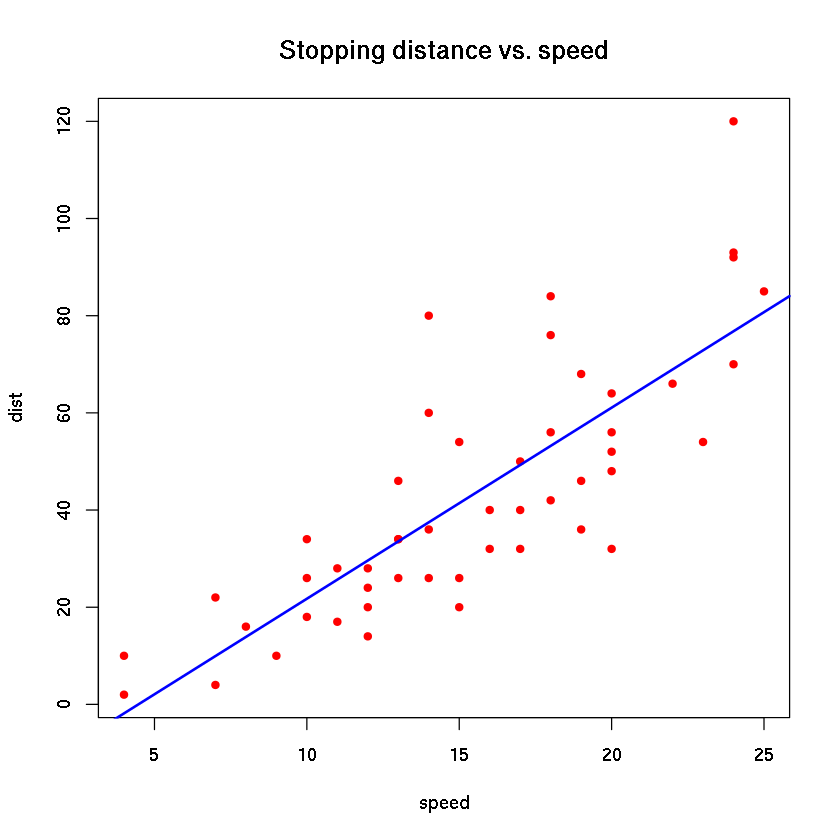

In [22]:
data(cars)
# ?cars
str(cars)
plot(dist~speed,data=cars,pch=19,col="red",cex=0.8,main="Stopping distance vs. speed")
cars.lm.1<-lm(dist~speed,data=cars)
abline(cars.lm.1,lwd=2.1,col="blue")
summary(cars.lm.1)

#### Linear regression with a quadratic term

Note the model syntax!


Call:
lm(formula = dist ~ speed + I(speed^2), data = cars)

Residuals:
    Min      1Q  Median      3Q     Max 
-28.720  -9.184  -3.188   4.628  45.152 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  2.47014   14.81716   0.167    0.868
speed        0.91329    2.03422   0.449    0.656
I(speed^2)   0.09996    0.06597   1.515    0.136

Residual standard error: 15.18 on 47 degrees of freedom
Multiple R-squared:  0.6673,	Adjusted R-squared:  0.6532 
F-statistic: 47.14 on 2 and 47 DF,  p-value: 5.852e-12


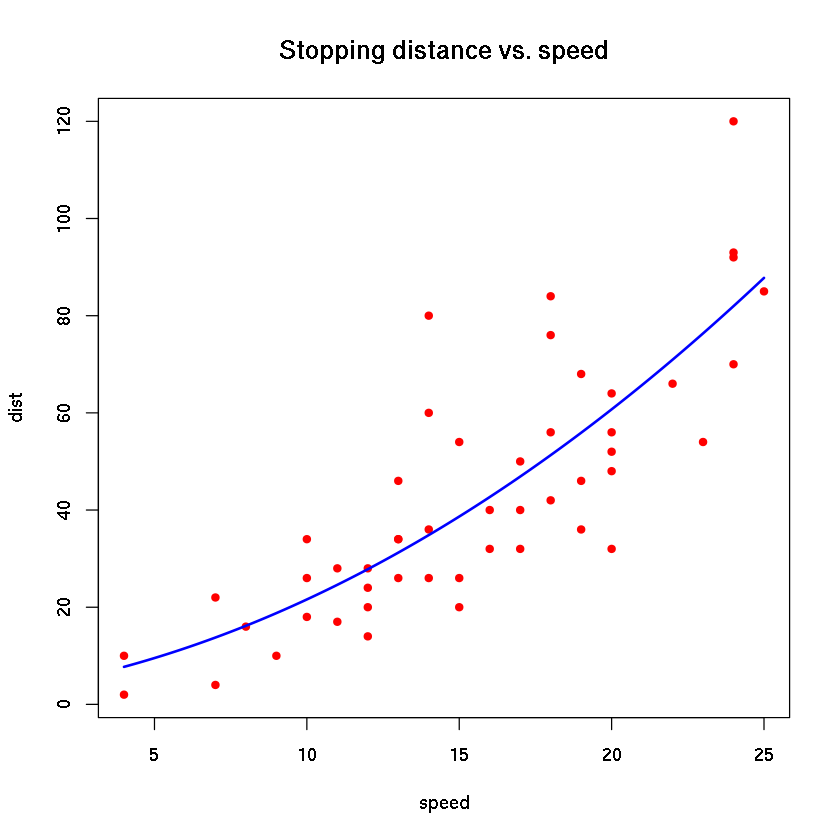

In [31]:
cars.lm.2<-lm(dist~speed+I(speed^2),data=cars)
summary(cars.lm.2)
plot(dist~speed,data=cars,pch=19,col="red",cex=0.8,main="Stopping distance vs. speed")
s<-seq(min(cars$speed),max(cars$speed),length=400)
d<-predict(cars.lm.2,newdata=data.frame(speed=s))
lines(s,d,lwd=2.1,col="blue")

#### Linear model with the logarithms of both predictor and response

This is an expedient device when one expects a power function relationship.


Call:
lm(formula = log(dist) ~ log(speed), data = cars)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.00215 -0.24578 -0.02898  0.20717  0.88289 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.7297     0.3758  -1.941   0.0581 .  
log(speed)    1.6024     0.1395  11.484 2.26e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4053 on 48 degrees of freedom
Multiple R-squared:  0.7331,	Adjusted R-squared:  0.7276 
F-statistic: 131.9 on 1 and 48 DF,  p-value: 2.259e-15


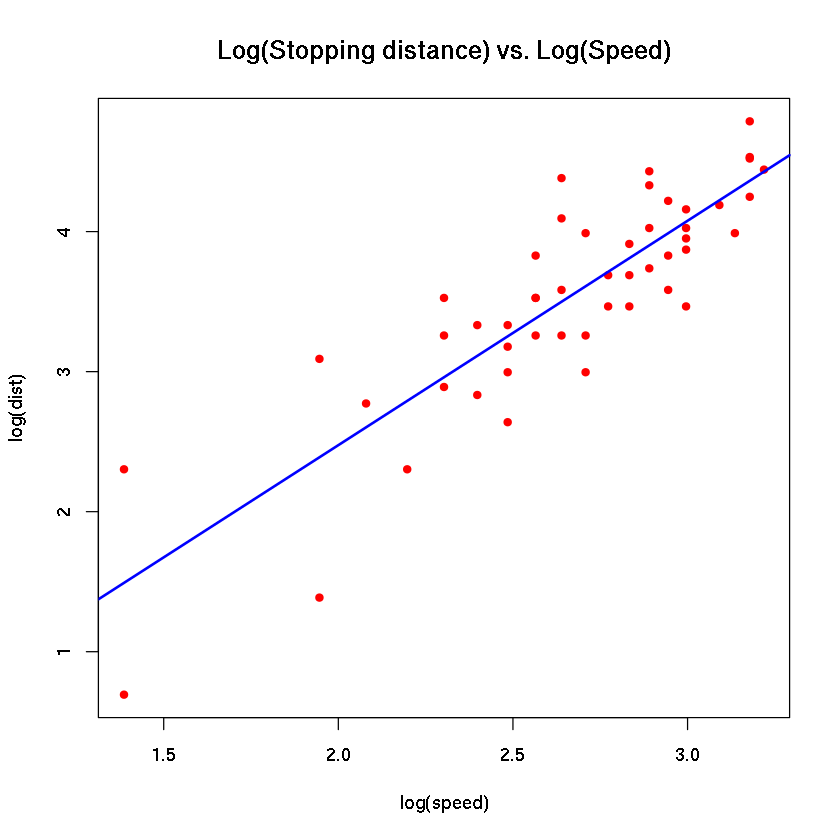

In [32]:
cars.lm.3<- lm(log(dist) ~ log(speed), data = cars)
summary(cars.lm.3)
plot(log(dist)~log(speed),data=cars,pch=19,col="red",cex=0.8,main="Log(Stopping distance) vs. Log(Speed)")
abline(cars.lm.3,lwd=2.1,col="blue")

## 3. Comparing regression models

### `hills` dataset

#### Package DAAG

From the book: Maindonald, J., Braun, J. (2003), _Data Analysis and Graphics Using R._ Cambridge University Press.

In [42]:
install.packages("DAAG",dependencies=TRUE,repos="https://cloud.r-project.org")
require(DAAG)

Installing package into ‘/home/crquispq7.alumnes/R/x86_64-pc-linux-gnu-library/3.3’
(as ‘lib’ is unspecified)
also installing the dependencies ‘SparseM’, ‘MatrixModels’, ‘latticeExtra’, ‘leaps’, ‘oz’, ‘quantreg’

Loading required package: DAAG
Loading required package: lattice

Attaching package: ‘DAAG’

The following object is masked from ‘package:VIF’:

    vif



Load the `hills` dataset and read its help:

In [43]:
data(hills)
str(hills)
#?hills

'data.frame':	35 obs. of  3 variables:
 $ dist : num  2.4 6 6 7.5 8 8 16 6 5 6 ...
 $ climb: num  650 2500 900 800 3070 ...
 $ time : num  0.268 0.806 0.561 0.76 1.038 ...


Intuition about the physics underlying this problem suggests a power function relationship which, in turn, motivates us to apply a logarithmic transformation. 

We prepare a new `data.frame` with the logarithms.

In [44]:
loghills<-log(hills)
names(loghills)<-c("logdist","logclimb","logtime")

Does the transformation improve the linear regression?
Compare both settings, scatterplots, correlation matrices.

In [49]:
#
# Insert here your code
#
hills.lm1<-lm(time~dist+climb,data=hills)
summary(hills.lm1)


Call:
lm(formula = time ~ dist + climb, data = hills)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.27038 -0.11922 -0.02022  0.04412  1.08479 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.491e-01  7.170e-02  -2.080   0.0456 *  
dist         1.036e-01  1.002e-02  10.340 9.94e-12 ***
climb        1.841e-04  3.419e-05   5.385 6.49e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2446 on 32 degrees of freedom
Multiple R-squared:  0.919,	Adjusted R-squared:  0.914 
F-statistic: 181.6 on 2 and 32 DF,  p-value: < 2.2e-16


In [50]:
hills.lm2<-lm(logtime~logdist+logclimb,data=loghills)
summary(hills.lm2)


Call:
lm(formula = logtime ~ logdist + logclimb, data = loghills)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.59491 -0.11464 -0.03847  0.04557  1.45532 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.17163    0.53501  -5.928 1.34e-06 ***
logdist      0.89440    0.12745   7.018 5.92e-08 ***
logclimb     0.17146    0.09317   1.840    0.075 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3147 on 32 degrees of freedom
Multiple R-squared:  0.8123,	Adjusted R-squared:  0.8006 
F-statistic: 69.25 on 2 and 32 DF,  p-value: 2.369e-12


#### Comparing regressions: relevant quantities

To this end we have the following available quantities:  

1. $\operatorname{ResSS}$, the Residual Sum of Squares
2. The coefficient of determination $R^2$
3. The $F$ statistic.
4. The $\operatorname{AIC}$ statistic (Akaike Information Criterion). 

$\operatorname{ResSS}$ is a goodness-of-fit measure: smaller values indicate a better fit. However, when a model $L_1$ is obtained by adding predictors to an initial one $L_0$, inevitably $\operatorname{ResSS}$ decreases ($\operatorname{ResSS}_1\leq \operatorname{ResSS}_0$) by geometry, since in the $L_1$ we are projecting on a subspace larger than in $L_0$. Similarly $R_1^2\geq R_0^2$.

From a statistical perspective we need to decide whether an observed decrease in $\operatorname{ResSS}$, or
increase in $R^2$ is significant. This is the purpose of $F$ and $\operatorname{AIC}$.

When we get a new model $L_1$ by adding a single predictor to a model $L_0$, the comparison $F$ statistic is defined as the relative decrease in $\operatorname{ResSS}$, that is, the ratio:

In [ ]:
# F01<-(ResSS0-ResSS1)/(ResSS1/df1)

`ResSS0` and `ResSS` are, respectively, the residual sum of squares of $L_0$  and $L_1$, and `df1` is the number of degrees of freedom of $L_1$. `F01` is a test statistic to decide between the null hypothesis:

$$
    H_{0} = \mbox{``The new predictor does not improve the model"}. 
$$

versus the alternative that it does. When the models are Gauss-Markov normal, `F01` follows a Fisher-Snedecor $F$ distribution with 1 and `df1` degrees of freedom.

$\operatorname{AIC}$ (Akaike Information Criterion) is an answer to a different problem: adding a predictor to a prediction model means we are adding a parameter to the prediction function (a linear function in this case) and, in general, increasing the number of parameters in a prediction function learned from a given training dataset tends to fit better this particular dataset at the cost of deteriorating the quality of predictions for other samples _from the same statistical population_ from which the training sample was extracted.

This is another instance of the bias/variance tradeoff. 

$\operatorname{AIC}$ is a _penalized (minus)log-likelihood,_ the difference:

$$
    -\log\cal{L}+\lambda\,\cal{P}, \mskip30mu \lambda>0,
$$

where an increase in log-likelihood gained by adding a new parameter can be cancelled by an increase in the penalization term $\cal{P}$. In this way we can tell the better from two _nested_ models (a pair of models where the set of predictors in one of them is a subset of that in the other). 

The better model is the one with a smaller $\operatorname{AIC}$ (tending to a larger likelihood). In R the $\operatorname{AIC}$ of a model $L$ can be obtained with:

In [ ]:
# extractAIC(L)

Which uses the definition:

In [ ]:
# AIC = - 2*log L + k * edf,

In particular, for a linear model, (DAAG pag. 153):

In [ ]:
# AIC= n*log(ResSS/n)+2*Regdf

For the `hills` dataset:

In [ ]:
loghills.l0<-lm(logtime~logdist,data=loghills)
loghills.l1<-lm(logtime~logdist+logclimb,data=loghills)

The following function extracts a list of relevant quantities from an object `L` of the `lm` class (the ones from last session, plus $\operatorname{AIC}$).

In [ ]:
Regression.Quantities<-function(L){
    y<-L$model[[1]]
    y0<-y-mean(y)
    TotalSS0<-sum(y0^2)
    n<-length(y)
    Totaldf<-n
    Totaldf0<-Totaldf-1
#
    yhat<-as.numeric(L$fitted.values)
    yhat0<-yhat-mean(yhat)
    RegSS0<-sum(yhat0^2)
    Regdf<-L$rank
    Regdf0<-Regdf-1
#
    ytilde<-as.numeric(L$residuals)
    ResSS<-sum(ytilde^2)
    Resdf<-Totaldf0-Regdf0
#
    TotalMeanS0<-TotalSS0/Totaldf0
    RegMeanS0<-RegSS0/Regdf0
    ResMeanS<-ResSS/Resdf
#
    R2<-RegSS0/TotalSS0
    RegF<-RegMeanS0/ResMeanS
    AIC=n*log(ResSS/n)+2*Regdf
#
    Q<-list(
        y=y,y0=y0,n=n,TotalSS0=TotalSS0,Totaldf=Totaldf,Totaldf0=Totaldf0,
        yhat=yhat,yhat0=yhat0,RegSS0=RegSS0,Regdf=Regdf,Regdf0=Regdf0,
        ytilde=ytilde,ResSS=ResSS,Resdf=Resdf,
        TotalMeanS0=TotalMeanS0,RegMeanS0=RegMeanS0,ResMeanS=ResMeanS,
        R2=R2,RegF=RegF,AIC=AIC)
    return(Q)
    }

Using `Regression.Quantities()`:

In [ ]:
loghills.Q0<-Regression.Quantities(loghills.l0)
loghills.Q1<-Regression.Quantities(loghills.l1)

From these results, decide which is the better model, according to the above criteria.

In [ ]:
#
# Insert your code here
#

The `stats` package has two functions, `add1()` and `drop1`, allowing us to perform this operation in a semi-automatic way. Either we add a predictor to the basic model:

In [ ]:
add1(loghills.l0,"logclimb")
add1(loghills.l0,"logclimb",test="F")
add1(loghills.l0,"logclimb",test="Chisq")

Or drop a variable from a larger model:

In [ ]:
drop1(loghills.l1,"logclimb")
drop1(loghills.l1,"logclimb",test="F")

In [ ]:
drop1(loghills.l1,"logdist")
drop1(loghills.l1,"logdist",test="F")

####  `Steam` dataset

Files: `Steam.dat.txt` (Data description),  `Steam1.txt` (Actual data).

In [ ]:
Steam<-read.table("Steam1.txt",header=TRUE)
str(Steam)

#### Exercise:

With the `Steam` dataset we try to find the best subset of predictors of `y` from `(x1,x2,x3,x4,x5,x6,x7,x8,x9)`:

With such data as `Steam`, with $p$ predictors, there is a large number of possible regressions –precisely $2^p$, the number of subsets of the set of all predictors- which, in principle, they can be tested by repeatedly applying the above functions, either starting with the base model with no predictors other than 
intercept:

In [ ]:
ls0<-lm(y~1, data=Steam)
summary(ls0)

and successively add predictors or, on the contrary, starting with the full model:

In [ ]:
ls1<-lm(y~x1+x2+x3+x4+x5+x6+x7+x8+x9, data=Steam)
summary(ls1)

And then successively remove them.

For instance, we start with `ls0`:

In [ ]:
add1(ls0,"x1",test="F")
# ...
add1(ls0,"x9",test="F")

We see that `x7` is the better addition.

We keep this variable and now we try to add a second one following the same procedure, and successively, until we find a satisfactory subset. 

This is the _forward_ variables selection method. 

Symmetrically, the _backward_ method starts with the full model `ls1` and sequentially removes variables.

It is worth noting that if, for instance, at a certain stage of a _forward_  procedure the current subset of variables is $A$, we have not tested all subsets of $A$ but only those in the path through which we arrived at $A$. To test them we should apply _backward_  selection from $A$ and so on. 

The `stats` package has a `step()` function to automate this process:

In [ ]:
step(ls0,"~x1+x2+x3+x4+x5+x6+x7+x8+x9")

Also from the full model:

In [ ]:
step(ls1)

Reasonably enough, this combined _forward_ and _backward_ procedure is called _stepwise._

The `MASS` package has analogous functions, `addterm()`, `dropterm()`, and `stepAIC()`, with the same functionality as the above functions in the basic `stats` package.

Finally, there is the strategy of computing all the possible $2^p$ regressions, with all the subsets in the set of predictors, from $\emptyset$ to the total number $p$ of predictors, and then comparing all the resulting $\operatorname{AIC}$ values, keeping the best one. 

This is the _All Subsets Regression_ method. Obviously, this computation is unfeasible by a brute force approach, except for models with a very small number of predictors. There are combinatorial _branch and bound_ algorithms allowing us to limit the number of actual regressions we need to evaluate in full. The method depends on imposing a partial ordering on the set of all possible regressions, giving it a tree-like structure, in which we will need to evaluate only a small number of nodes. The `leaps` package implements this procedure (the name originates from the idiom  _leaps and bounds)._

# Homework 1 (part 1)

This is the first half. The second half will appear at the end of the next laboratory (Regression 03 - Regularization). The aim here is to apply linear regression on the `Home prices` dataset from Kaggle  [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/discussion). As explained in the documentation there, this dataset is a test bed for many prediction methods, thus it is not to be expected that linear regression will be particularly succesful. Later on in the course we will try other methods.

As a warmup, take the similar but smaller `Boston home prices` dataset. This is a very classic example and it is easy to find its study with linear regression in many online resources. Googling "Boston home prices" will yield many implementations, both in R and in python.

You can learn from and even reproduce parts of these sources. This is acceptable provided that you:

   1. Give credit where it is due, in particular, including full reference (URL) of any cited work
    
   2. Do not copy/paste "in extenso" large chunks of code
    
   3. Understand everything you write, explaining with sufficient details the steps you take and the results you obtain.

The Boston home prices data are intended for prediction of home values in suburbs of the namesake city. `medv` is the response variable and the other variables are predictors. See their description in the dataset help. Some of these predictors are intrinsic habitational characteristics, such as number of bedrooms; other predictors have a socioeconomic nature and, finally, other predictors are geographical or environmental.

 
In R you find this dataset in the MASS package, from the book by  W. N. Venables and   B. D. Ripley (2002), _Modern Applied Statistics with S:_

In [ ]:
require(MASS)
data(Boston)
str(Boston)

##### Guidelines

Perform a statistical description of the data. In the first place individually, summarizing each variable, both graphically, e.g. with boxplot and histogram, and numerically. Do these variables have a normal appearance? Or, rather, do these variables show an asymmetric shape? Check correlations between pairs of predictors and between individual predictors and response. It will be useful to truncate to 2 or 1 decimal places, to avoid clutter:

In this way we can see at a glance which correlations are large or small. Is there a danger of multicollinearity? 

Fit a linear regression model of `medv` on the remaining variables. From the model summary, can we state the model fits well? which variables appear to be better or worse predictors? 

Prepare an optimal model with the better predictors. The `ResSS` of this model is much larger than the one from the full model? Note that this model still has a non significant predictor. Discard it. 

Fit another linear regression model with response `log(medv)` on the remaining predictors or with their logarithms. Which one is better?

#### Back to the Kaggle _House prices_ dataset

Redo the operations above with the new dataset, replacing the response `medv` with `SalePrice`. 

In [ ]:
HP.train<-read.csv("House.prices.train.csv")
str(HP.train)

In [ ]:
HP.test<-read.csv("House.prices.test.csv")
str(HP.test)

#### Remarks

1. This dataset is divided in two halves, `train` and `test`. The first one is to train the prediction algorithm (in the `lm` case, compute the regression coefficients) which then is assessed with the second one. This is a usual procedurein Machine Learning, to avoid the optimistic bias due to using the same data for both functions. Note that here in the testing half the response is missing. We are to predict it!

2. The first column in both train and test files is an `Id` case number. Make sure you remove it before any computation. It may be kept aside for post-processing steps, e.g., visualization.

In [ ]:
HP.train<-HP.train[,-1]
str(HP.train)

In [ ]:
HP.test<-HP.test[,-1]
str(HP.test)

3. Missing data are trouble in this dataset, something that, as a matter of fact, often happens with real data. As a first approach one could try to `na.omit()` (look up in help what this function does). Unfortunately it seems that each and every row contains some `NA` hence the result of `na.omit()` is an empty dataset. Better try to select, in a first analysis, those variables (columns) with no `NA`. The following piece of code will count the number of columns with no `NA`. I found $61$ of them. Isolate these columns and perform the analysis with them.: 

In [ ]:
count.na<-function(x){sum(is.na(x))}
HP.train.m<-as.matrix(HP.train)
Rows.with.NA<-apply(HP.train.m,1,count.na)
table(Rows.with.NA)
Cols.with.NA<-apply(HP.train.m,2,count.na)
table(Cols.with.NA)